In [0]:
# read in the vocabulary file 
def readvocab():
   # keep track of the number of words
    lexiconsize = 0
   # initialize an empty dictionary
    dict = {}
   # create a feature for unknown words
    dict["@unk"] = lexiconsize
    lexiconsize += 1
   # read in the vocabular file
    with open("vocab.txt", "r") as f:
        data = f.readlines()
   # Process the file a line at a time.
    for line in data:
        # The count is the first 3 characters
        count = int(line[0:4])
        # The word is the rest of the string
        token = line[5:-1]
       # Create a feature if it’s appeared at least twice
        if count > 1: 
            dict[token] = lexiconsize
            lexiconsize += 1
    # squirrel away the total size for later reference
    dict["@size"] = lexiconsize
    return(dict)

In [2]:
!wget https://github.com/mlittmancs/great_courses_ml/raw/master/vocab.txt

--2020-05-10 14:43:41--  https://github.com/mlittmancs/great_courses_ml/raw/master/vocab.txt
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/vocab.txt [following]
--2020-05-10 14:43:41--  https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/vocab.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83233 (81K) [text/plain]
Saving to: ‘vocab.txt’

vocab.txt           100%[===================>]  81.28K  --.-KB/s    in 0.009s  

2020-05-10 14:43:42 (9.11 MB/s) - ‘vocab.txt’ saved [83233/83233]



In [0]:
# Turn string str into a vector.
def tokenize(str,dict):
  # initially the vector is all zeros
  vec = [0 for i in range(dict["@size"])]
  # for each word
  for t in str.split(" "):
   # if the word has a feature, add one to the corresponding feature
    if t in dict: vec[dict[t]] += 1
   # otherwise, count it as an unk
    else: vec[dict["@unk"]] += 1
  return(vec)

In [0]:
# read in labeled examples and turn the strings into vectors
def getdat(filename, dict):
    with open(filename, "r") as f:
        data = f.readlines()
    dat = []
    labs = []
    for line in data:
        labs = labs + [int(line[0])]
        dat = dat + [tokenize(line[2:], dict)]
    return(dat, labs)

In [10]:
!wget https://github.com/mlittmancs/great_courses_ml/raw/master/spam-test.csv
!wget https://github.com/mlittmancs/great_courses_ml/raw/master/spam-train.csv

--2020-05-10 14:47:14--  https://github.com/mlittmancs/great_courses_ml/raw/master/spam-test.csv
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/spam-test.csv [following]
--2020-05-10 14:47:14--  https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/spam-test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166047 (162K) [text/plain]
Saving to: ‘spam-test.csv’

spam-test.csv       100%[===================>] 162.16K  --.-KB/s    in 0.01s   

2020-05-10 14:47:15 (11.0 MB/s) - ‘spam-test.csv’ saved [166047/166047]

--2020-05-10 14:47:15--  https://git

In [0]:
dict = readvocab()
traindat, trainlabs = getdat("spam-train.csv", dict)
testdat, testlabs = getdat("spam-test.csv", dict)

In [16]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 6)	
clf = clf.fit(traindat, trainlabs)	

yhat = clf.predict(testdat)

sum([yhat[i] == testlabs[i] for i in range(len(testdat))])/len(testdat)

0.9415

In [17]:
#wordlist = len(dict)
#wordlist
#for word in dict:
#  print(dict[word])
wordlist = [word for word in dict]
wordlist = wordlist[:(len(wordlist)-1)]
wordlist[-1]


'0'

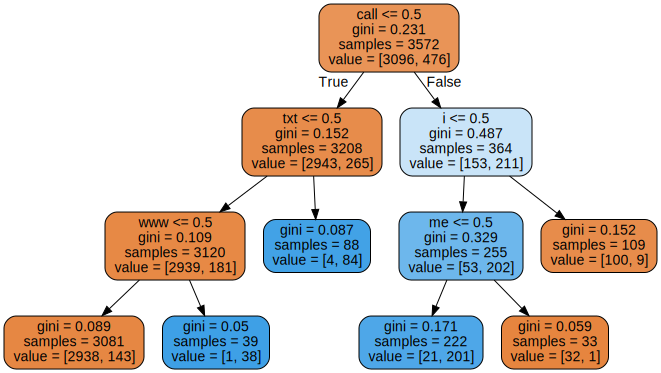

In [18]:
import graphviz 		

dot_data = tree.export_graphviz(clf, feature_names=wordlist,
                      filled=True, rounded=True) 
graph = graphviz.Source(dot_data)	
graph	

In [19]:
for count in range(30):
  leaves = count+2
  clf = tree.DecisionTreeClassifier(max_leaf_nodes = leaves)	
  clf = clf.fit(traindat, trainlabs)	
  yhat = clf.predict(testdat)
  acc = sum([yhat[i] == testlabs[i] for i in range(len(testdat))])/len(testdat)
  print(leaves,acc)

2 0.888
3 0.913
4 0.931
5 0.937
6 0.9415
7 0.942
8 0.9385
9 0.9425
10 0.945
11 0.9475
12 0.949
13 0.9515
14 0.9525
15 0.9535
16 0.9545
17 0.9535
18 0.959
19 0.959
20 0.959
21 0.9595
22 0.9565
23 0.957
24 0.958
25 0.958
26 0.9585
27 0.9585
28 0.958
29 0.9585
30 0.958
31 0.958


In [20]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(traindat, trainlabs)
clf = clf.fit(traindat, trainlabs)	
yhat = clf.predict(testdat)
acc = sum([yhat[i] == testlabs[i] for i in range(len(testdat))])/len(testdat)
acc

0.959

In [21]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(testlabs, yhat))

[[1690   39]
 [  43  228]]
